In [14]:
# !wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
# !unzip trainingandtestdata.zip

These code snippets are for importing a data set from a file, reading it into a pandas DataFrame, and creating some summary statistics about the data.

The data set is in a file called 'training.1600000.processed.noemoticon.csv', and it has six columns with the following names: 'target', 'ids', 'date', 'flag', 'user', and 'text'. The 'target' column contains the label for each tweet, with a value of 0 indicating a negative tweet and a value of 4 indicating a positive tweet.

The code reads the data from the file into a pandas DataFrame, and then selects a subset of the data by slicing the DataFrame with the .iloc[] method. The selected subset is the rows with indices between 790000 and 810000 (inclusive).

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import pickle
# import feather


cols = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv', sep=',',names=cols,encoding='latin-1', header=None)

df.loc[df['target'] == 4, 'target'] = 1

target = df.target
text = df.text

Explore the data by printing some sample rows and examining the structure of the DataFrame. I used the head to get an overview of the data

In [16]:
df.head()

,target,ids,date,flag,user,text
500000,0,2186710671,Mon Jun 15 19:13:35 PDT 2009,NO_QUERY,xxLOVExxPEACE,i cant sleep
500001,0,2186710748,Mon Jun 15 19:13:35 PDT 2009,NO_QUERY,dvanulya,@alba17 Sorry about kid situation. Good luck w...
500002,0,2186710897,Mon Jun 15 19:13:36 PDT 2009,NO_QUERY,byhuy,nhá» nhÃ quÃ¡!!! cá»© má»i láº§n nghe bÃ i ...
500003,0,2186711047,Mon Jun 15 19:13:37 PDT 2009,NO_QUERY,Chi_lanta,Missing Him!! Twitter Me RED?? What the heck i...
500004,0,2186711267,Mon Jun 15 19:13:38 PDT 2009,NO_QUERY,IBEChillin,#musicmonday i got the blues today ***sad ...


The .value_counts() method was used to compute the number of occurrences of each unique value in the 'target' column of the DataFrame. This produces a count of the number of positive and negative tweets in the selected subset of the data.

In [17]:
pd.isnull(df).sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

# Q1
## Explore and prepare the data (Tokenization, Stemming, Stopwords, visualization, etc.)

To remove URLs from tweets while preprocessing the text, Regular expression used to identify and remove any string that matches the pattern of a URL. re module was used to perform regular expression matching

This function uses the re.sub() function to search for any strings that match the pattern http\S+ and replace them with an empty string. The \S character class matches any non-whitespace character, and the + quantifier indicates that one or more of these characters should be matched. This will remove the URL from the tweet and leave the rest of the text unchanged.

In [18]:
# remove urls
import re
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+|\d+')
    return url.sub(r'',text.lower())

text = text.apply(lambda x : remove_url(x))

Tokenize the text of the tweets using a suitable tokenization method. I can also consider using regular expressions or a custom tokenization function if necessary.

The first step in the preprocessing is tokenization, which involves splitting the text into individual words or "tokens". This is done using the word_tokenize() function from the nltk.tokenize module, and the resulting list of tokens is stored in the DataFrame.

The nltk.download() function is used to download two resources from the Natural Language Toolkit (nltk) library: the punkt tokenizer model and the stopwords list. The punkt model is used by the word_tokenize() function to identify the boundaries between tokens, and the stopwords list contains a list of common words that are usually removed from text data as part of the preprocessing step.

The tokenized text is then saved to a file called 'tokenized.pkl' using the to_pickle() method.

In [19]:
#Tokenization

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

text = text.apply(word_tokenize)

!mkdir data
text.to_pickle('data/tokenized.pkl')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darklane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darklane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
A subdirectory or file data already exists.


The next step in the preprocessing is to remove stopwords and punctuations from the text. The list of stopwords is obtained from the nltk library, and a list of punctuation symbols is created using the string.punctuation attribute.

The text is then stemmed using the Porter stemmer algorithm, which converts each word to its base form by removing common suffixes. The stemmed words are then stored in a file called 'stemmed.pkl' using the to_pickle() method.

In [20]:
#remove stopwords and punctuations
text = pd.read_pickle('data/tokenized.pkl')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

#Stemming
import string
punctuations = list(string.punctuation)

text = text.apply(lambda x: [ps.stem(item) for item in x if item not in stop_words and item not in punctuations])

text.to_pickle('data/stemmed.pkl')


Visualize the data by plotting word frequencies or creating word clouds. This gives a sense of the most common words in the dataset and help to identify patterns and trends.

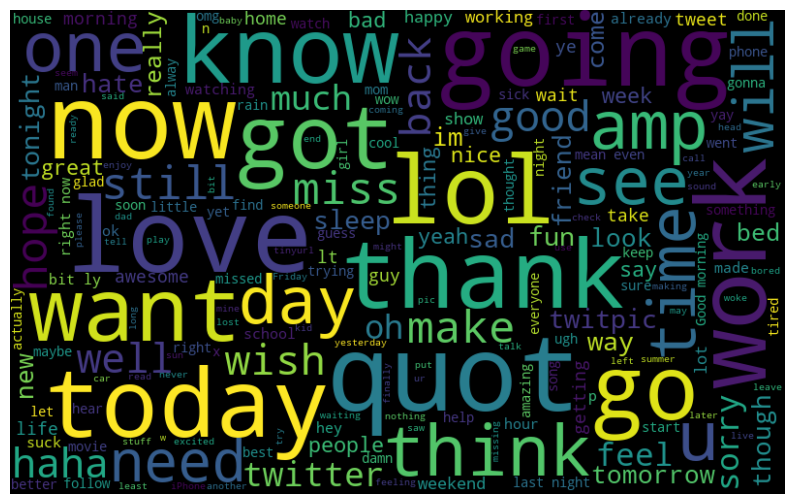

In [21]:
# visualization 

import matplotlib.pyplot as plt
import seaborn as sns

#wordcloud
# %pip install wordcloud
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
text = pd.read_pickle('data/stemmed.pkl')
text = text.apply(lambda x: " ".join([word for word in x]))
text.to_pickle('data/cleaned.pkl')
text.head(5)

500000                                           cant sleep
500001    alba sorri kid situat good luck vid sorri 's g...
500002    nhá »  nhã quã¡ cá » © má » i láº§n nghe bã ...
500003             miss twitter red heck girl todo sad face
500004                       musicmonday got blue today sad
Name: text, dtype: object

# Q2
## Build a BOW and train a KNN, Decision Tree, and SVM model


This is creating a bag of words (BOW) representation of text data stored in a pandas DataFrame called 'text'. A BOW representation is a way of encoding text data as numerical values, which can be used as input to machine learning models.

To create the BOW representation, the code first imports the CountVectorizer class from the feature_extraction.text module of the scikit-learn library. It then creates an instance of the CountVectorizer class and fits it to the 'text' DataFrame using the fit_transform method. The resulting BOW representation is stored in a variable called 'Text'.

The CountVectorizer class has several parameters that can be adjusted to control how the BOW representation is created. In this case, the 'max_features' parameter is set to 1100, which limits the number of features (i.e., unique words or n-grams) to consider in the BOW representation. The 'ngram_range' parameter is set to (1, 3), which indicates that the BOW representation should include 1-grams (individual words), 2-grams (pairs of words), and 3-grams (triplets of words).

Finally, the BOW representation is converted to an array using the toarray method and then cast to the 'int8' data type using the astype method.

In [23]:
#Building a BOW

# Vectorize the text data into a bag of words representation
vectorizer = CountVectorizer(max_features=1100, ngram_range=(1,3))
Text = vectorizer.fit_transform(text)
Text = Text.toarray().astype('bool')

In [24]:
# feather.write_dataframe(pd.DataFrame(Text), 'data/Text.feather')

It's worth noting that when working with unbalanced data, it can be helpful to use stratified sampling to ensure that the training and test sets have a similar class distribution to the original dataset. To do this, stratify parameter was passed to train_test_split().

This will ensure that the training and test sets have a similar class distribution to the original dataset, which can be especially important when working with unbalanced data.

In [25]:
# import feather
# Text = feather.read_dataframe('data/Text.feather').to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Text, target, test_size=0.1, random_state=0, stratify=target)

## Training Models

The KNN model is trained using the KNeighborsClassifier class from the neighbors module of the scikit-learn library. The classifier is initialized with the parameter 'n_neighbors' set to 2, which specifies the number of nearest neighbors to consider when making predictions. The fit method is then used to train the model on the training data stored in the 'X_train' and 'y_train' variables. The 'X_train' variable contains the feature data, while the 'y_train' variable contains the labels.

In [26]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
pickle.dump(knn, open('data/knn.pkl', 'wb'))

The SVM model is trained using the LinearSVC class from the svm module of the scikit-learn library. The classifier is initialized with the parameter 'C' set to 0.9, which controls the regularization strength of the model. The fit method is then used to train the model on the training data stored in the 'X_train' and 'y_train' variables.

In [27]:
from sklearn.svm import LinearSVC

# Train a linear SVM classifier
svm = LinearSVC(C=0.9, random_state=0)
svm.fit(X_train, y_train)
pickle.dump(svm, open('data/svm.pkl', 'wb'))

The XGBoost model is trained using the XGBClassifier class from the xgboost library. The classifier is initialized with default parameters and the fit method is used to train the model on the training data stored in the 'X_train' and 'y_train' variables.


In [28]:
from xgboost import XGBClassifier
# model = XGBClassifier(tree_method='gpu_hist')
model = XGBClassifier()
model.fit(X_train,y_train)
pickle.dump(knn, open('data/dt.pkl', 'wb'))

 # Q3
 ##  Evaluate the above models (confusion matrix, accuracy, classification report, etc.)

Below code evaluate the performance of models on the test dataset. It first calculates and prints the accuracy of the model using the accuracy_score function from the metrics module of the scikit-learn library. The accuracy is calculated by comparing the predicted labels stored in the 'y_pred_knn','y_pred_svm' and 'y_pred_dt' variable to the true labels stored in the 'y_test' variable.

It then uses the confusion_matrix function from the metrics module to calculate a confusion matrix, which is a table that shows the number of correct and incorrect predictions made by the model. The confusion matrix is visualized using the heatmap function from the seaborn library. The heatmap function also displays the annotation of the matrix values.

Finally, it a classification report using the classification_report function from the metrics module. The classification report includes several evaluation metrics, such as precision, recall, and f1-score, for each class in the dataset. These metrics can provide a more detailed understanding of the model's performance


Accuracy- 0.6559 

              precision    recall  f1-score   support

           0       0.62      0.82      0.70     30000
           1       0.73      0.50      0.59     30000

    accuracy                           0.66     60000
   macro avg       0.67      0.66      0.65     60000
weighted avg       0.67      0.66      0.65     60000



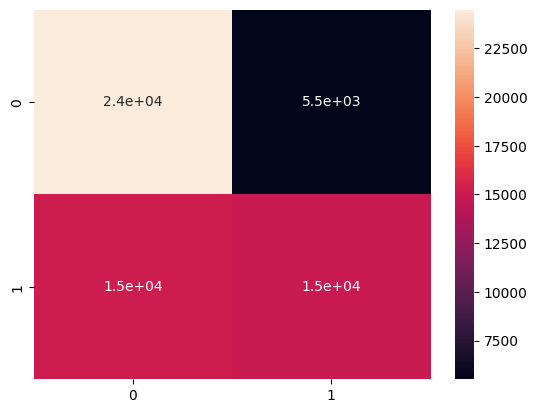

In [29]:
# KNN
knn = pickle.load(open('data/knn.pkl', 'rb'))
y_pred_knn = knn.predict(X_test)

print("\nAccuracy-",accuracy_score(y_test, y_pred_knn),'\n')
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,y_pred_knn))


Accuracy- 0.75775 

              precision    recall  f1-score   support

           0       0.79      0.71      0.74     30000
           1       0.73      0.81      0.77     30000

    accuracy                           0.76     60000
   macro avg       0.76      0.76      0.76     60000
weighted avg       0.76      0.76      0.76     60000



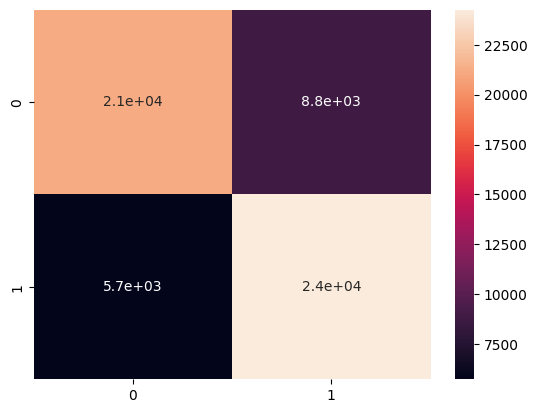

In [30]:
#SVM

# Predict the labels for new data
modelSvm = pickle.load(open('data/svm.pkl', 'rb'))
y_pred_svm = modelSvm.predict(X_test)

print("\nAccuracy-",accuracy_score(y_test, y_pred_svm),'\n')
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,y_pred_svm))


Accuracy- 0.6559 

              precision    recall  f1-score   support

           0       0.62      0.82      0.70     30000
           1       0.73      0.50      0.59     30000

    accuracy                           0.66     60000
   macro avg       0.67      0.66      0.65     60000
weighted avg       0.67      0.66      0.65     60000



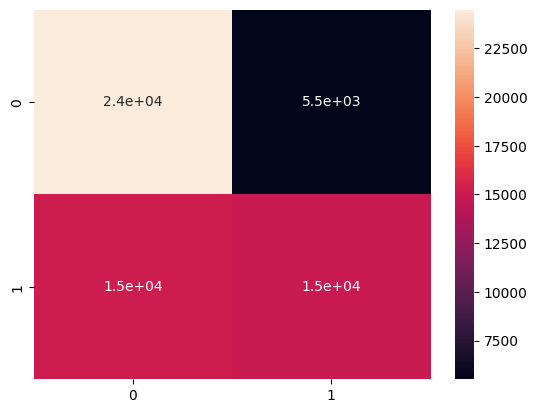

In [31]:
#DecisionTree
modelKnn = pickle.load(open('data/dt.pkl', 'rb'))
y_pred_dt = modelKnn.predict(X_test)

print("\nAccuracy-",accuracy_score(y_test, y_pred_dt),'\n')
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,y_pred_dt))